In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

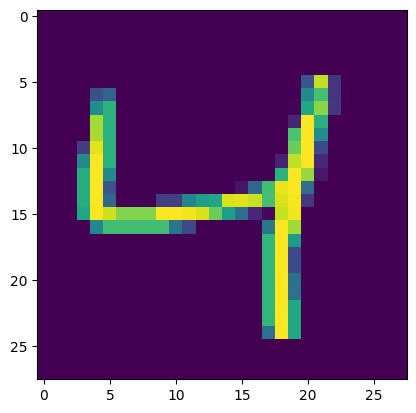

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [17]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6182 - accuracy: 0.3951 - val_loss: 1.3966 - val_accuracy: 0.4852
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2856 - accuracy: 0.5163 - val_loss: 1.2300 - val_accuracy: 0.5300
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1141 - accuracy: 0.5773 - val_loss: 1.0461 - val_accuracy: 0.6321
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9493 - accuracy: 0.6693 - val_loss: 0.8693 - val_accuracy: 0.7278
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8003 - accuracy: 0.7509 - val_loss: 0.7303 - val_accuracy: 0.7987
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6847 - accuracy: 0.7959 - val_loss: 0.6394 - val_accuracy: 0.8125
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6057 - accuracy: 0.8209 - val_loss: 0.5759 - val_accuracy:

In [24]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8763

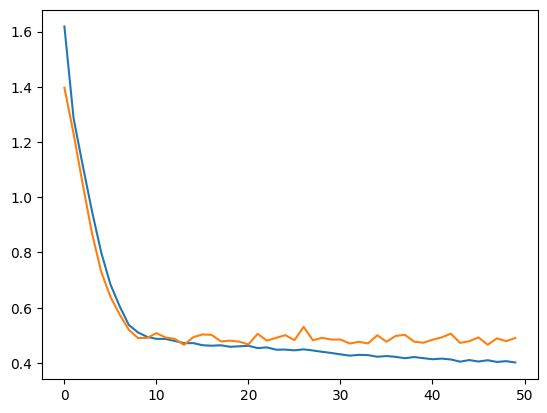

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([2], dtype=int64)